## Tweepy basics

In [7]:
import tweepy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
import requests
from time import sleep, strftime
import random
from random import randint
from bs4 import BeautifulSoup
from selenium import webdriver
import shutil
import pickle

In [10]:
consumer_key = 'fWf4TPtL187ePWhczCrV6NCZT'
consumer_secret = 'JwIlFbJcjPOtR6lXvoeFMWJn4KuEEuNPSPiffSbaM4enhjUeYi'
access_token  = '1290989500525621248-T9H9xiT08C4Tl2INBvulLoeIp3W3hC'
access_token_secret = 'UFwnHYA8ZqZv6Ay6tlmwmTCsIENwUJFmqD0sr2qJaRZwx'

In [11]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

1. Twittea el siguiente tweet: “Aprendiendo a utilizar la API de Twitter #ILoveDataScience #BootcampNeoland2020”.

In [14]:
api.update_status('Tweet generado desde la API')

Status(_api=<tweepy.api.API object at 0x1a189b0e10>, _json={'created_at': 'Thu Aug 06 07:26:18 +0000 2020', 'id': 1291274383630237697, 'id_str': '1291274383630237697', 'text': 'Tweet generado desde la API', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1290989500525621248, 'id_str': '1290989500525621248', 'name': 'ClaraG', 'screen_name': 'ClaraG56399764', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 0, 'listed_count': 0, 'created_at': 'Wed Aug 05 12:35:11 +0000 2020', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 3, 'lang': None, 'contributors_enabled': False, 'is_transla

2. Busca los tweets con el hashtag #BootcampNeoland2020 y obtén un diccionario con el id y nombre de quienes twittearon con ese hashtag. Después retuitea todos los tweets con ese hashtag.

In [41]:
tweets_boot = api.search(q='#BootcampNeoland2020')
diccionario=dict()
for i in range(len(tweets_boot)):
    id_=tweets_boot[i].id
    name=tweets_boot[i].user.screen_name
    
    diccionario[id_]=name
diccionario

{1291279773071806465: 'santilondo',
 1291279771285041154: 'santilondo',
 1291279769443667970: 'santilondo',
 1291274595971076097: 'ClaraG56399764',
 1291274241166450688: 'AdreanCeja',
 1291274239706791936: 'AdreanCeja',
 1291274238251458560: 'AdreanCeja',
 1291274235239956480: 'AdreanCeja',
 1291272309882396674: 'davidag38128554',
 1291270898390052864: 'AdreanCeja',
 1291270647612612608: 'AdreanCeja',
 1291037432482271232: 'santilondo'}

3. Obtén 3 imágenes de todocuadro.com más la información de las imágenes (Nombre, Autor, Estilo y Técnica) y twittea cada imagen con el siguiente texto: “El Cuadro llamado “Nombre” de “Autor”, el estilo es “Estilo” y la técnica utilizada es “Técnica #Nombre #Autor”.

In [77]:
chrome_driver = ("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/scripts/selenium/chromedriver")
navegador = webdriver.Chrome(executable_path=chrome_driver)
navegador.get("https://www.todocuadros.es/")
sleep(randint(2,5))
navegador.find_element_by_partial_link_text('Cuenta').click()
sleep(randint(2,5))
navegador.find_element_by_link_text('Acceder').click()

Email = "adrianceja1@gmail.com"
Contraseña = "NEOLAND2020"
usuario = navegador.find_element_by_id('email')
usuario.send_keys(Email)

sleep(randint(2,5))

contra = navegador.find_element_by_id('pass')
contra.send_keys(Contraseña)

sleep(randint(2,5))

usuario.submit()
sleep(randint(2,5))

In [27]:
#Creo la carpeta de fotos
import os
os.mkdir('carpeta fotos')

In [78]:
cuadro=[]
tecnica=[]
estilo=[]
lista=[]
keys=["vincent van gogh","Picasso","dali Salvador"]

for key in keys:
    busq = navegador.find_element_by_id("search")
    busq.send_keys(key)
    sleep(randint(2,5))
    busq.submit()
    source = navegador.page_source
    soup = BeautifulSoup(source)
    #Creo una lista con el nombre de los cuadros
    cuadros =[i.text for i in soup.find_all("span", class_="snize-title")]
    
    navegador.find_element_by_partial_link_text(cuadros[0]).click()
    sleep(randint(2,5))
    soup = BeautifulSoup(navegador.page_source)
    sleep(randint(2,5))
    
    inf=soup.find_all("div",class_="options-butt-0")
    info=[i.text.strip() for i in inf]
    
    lista.append(info)
    #cadena=cadena[1].split("\n")
    #cuadro=cadena[0]
    #estilo=cadena[4]
    #tecnica=cadena[5]
    #lista.append(cadena)
    
    #img_cuadro = soup.find("a", class_="MagicThumb")["href"]
    #sleep(randint(2,5))
    #resp = requests.get(img_cuadro, stream = True)
    #sleep(randint(2,5))
     
    #imagen= open("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/scripts/selenium/carpeta fotos/foto"+(key)+".jpg", 'wb')
    
    #resp.raw.decode_content = True
    
    #shutil.copyfileobj(resp.raw, imagen)
    
    #imagen.close()
    
    


4.Haz una búsqueda de 10 tweets por cada palabra clave de la siguiente lista:
- #MachineLearning
- #DeepLearning
- #Python
- #SQL
- #MongoDB
- #TensorFlow
- #Keras

In [163]:
tweet = api.search(q="MachineLearning",count=10)
tweet[1].favorite_count

0

In [153]:
names=[]
idd=[]
lista=["#MachineLearning","#DeepLearning","#Python","#SQL","#MongoDB","#TensorFlow","#Keras"]
location=[]
text=[]
date=[]
retw=[]
clave=[]
for j in lista:
    tweets = api.search(q=j,count=10)
    for i in range(len(tweets)):
        names.append(tweets[i].user.screen_name)
        idd.append(tweets[i].id)
        location.append(tweets[i].user.location)
        text.append(tweets[i].text)
        date.append(tweets[i].created_at)
        retw.append(tweets[i].retweet_count)
        clave.append(j)
        
df=pd.DataFrame(columns=["Clave","Name","Id","Location","Date","Tweet","Retweets"])
df["Clave"]=clave
df["Name"]=names
df["Id"]=idd
df["Location"]=location
df["Tweet"]=text
df["Retweets"]=retw
df["Date"]=date

df   
    
    

,Clave,Name,Id,Location,Date,Tweet,Retweets
0,#MachineLearning,SrlMancini,1291306348186087424,,2020-08-06 09:33:19,RT @COLLAB_Recruit: How Machine Learning is In...,10
1,#MachineLearning,Taieb_Bot,1291306140324724736,Raspberry PI,2020-08-06 09:32:29,RT @sarthak_300: Wow👇\n\n#tech #technews #prog...,11
2,#MachineLearning,AiGame_dev,1291306123925106688,United States,2020-08-06 09:32:25,2020 Machine Learning Roadmap\n\n☞ https://t.c...,0
3,#MachineLearning,KKTech7,1291306119562842112,,2020-08-06 09:32:24,RT @sarthak_300: Wow👇\n\n#tech #technews #prog...,11
4,#MachineLearning,Anvith64518557,1291306041804636160,Bangalore,2020-08-06 09:32:06,RT @ingliguori: #Infographic: The technologies...,93
5,#MachineLearning,2Bftawfik,1291306028399767553,"Cairo, Egypt",2020-08-06 09:32:03,RT @kaif_badshah: Have you seen the social dis...,1
6,#MachineLearning,kaif_badshah,1291306006534709248,,2020-08-06 09:31:57,Have you seen the social distance-inator???🧐🧐🧐...,1
7,#MachineLearning,trebor74hr,1291305984174981120,"Zagreb, Croatia",2020-08-06 09:31:52,A Visual Survey of Data Augmentation in #NLP h...,0
8,#MachineLearning,KKTech7,1291305895687671809,,2020-08-06 09:31:31,RT @SamuelAkins12: Designed for an anti collis...,17
9,#MachineLearning,Paaresh_,1291305889610137600,"Nagpur, India",2020-08-06 09:31:30,RT @ieee_cis_ghrce: Register for our upcoming ...,4


## Parte 2

1. Obtén todos los tweets de @IronhackMAD y crea un dataframe como el que se creó con @NeolandStudio, con las columnas text, date, id, rt, fav, year, month, weekday, hour.

In [166]:
def display_user_info(user):
    print('User: '+ user.screen_name)
    print('Name: '+user.name)
    print('Location: '+user.location)
    print('Friends: '+ str(user.friends_count))
    print('Followers: '+ str(user.followers_count))
    print('id: '+str(user.id))
    print('Desde: '+str(user.created_at))

In [167]:
Ironhack = api.get_user('IronhackMAD')
display_user_info(Ironhack)

User: IronhackMAD
Name: Ironhack Madrid
Location: Paseo de la Chopera 14, Madrid
Friends: 1177
Followers: 2672
id: 803619892310093824
Desde: 2016-11-29 15:21:27


In [170]:
tuits=tweepy.Cursor(api.user_timeline, Ironhack.id).items()
tuitsih = [[tuit.text,tuit.created_at,tuit.id, tuit.retweet_count,tuit.favorite_count] for tuit in tuits]


In [177]:
dfih = pd.DataFrame(tuitsih, columns=['tweet','date','id','rt','fav'])


In [174]:
semana = {0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}

In [225]:
dfih['year']=dfih.date.apply(lambda x: x.year)
dfih['month']=dfih.date.apply(lambda x: x.month)
dfih['weekday']=dfih.date.apply(lambda x: semana[x.weekday()])
dfih['hour']=dfih.date.apply(lambda x: x.hour)

In [176]:
dfih.head()

,tweet,date,id,rt,fav,year,month,weekday,hour
0,RT @dsaltaren: 🙌 Oferta de trabajo:\n\nEstamos...,2020-07-29 16:26:05,1288511121805254657,53,0,2020,7,Miércoles,16
1,@cesantaniello En el enlace del tweet 😊 https:...,2020-07-29 16:25:42,1288511025583726592,0,0,2020,7,Miércoles,16
2,En este #workshop llevaremos el potencial de #...,2020-07-29 10:35:37,1288422923313860608,1,1,2020,7,Miércoles,10
3,#React es una de las librerías más utilizadas ...,2020-07-22 09:39:17,1285872030638899201,0,0,2020,7,Miércoles,9
4,RT @M_Emprendedora: Ironhack y https://t.co/aC...,2020-07-21 09:32:53,1285508031862714369,2,0,2020,7,Martes,9


2. Obtén una lista de los hashtags del conjunto de tweets y cuentalos.

In [192]:
dfih["Position#"]=dfih["tweet"].str.find("#")
lista=list(dfih[dfih["Position#"]!=0]["tweet"])
len(lista)

1263

In [213]:
a=dfih["tweet"].tolist()
a2=a[0].split("#")
a2

['RT @dsaltaren: 🙌 Oferta de trabajo:\n\nEstamos buscando un visual designer que trabaje mano a mano con @albavillamila @faniperdia y conmigo e…']

3. Compara la lista anterior de hashtag con los de @NeolandStudio y obtén los hashtags que ambos utilizan. 

4. Obtén el número de tweets por año, por mes de cada año, por día de la semana y la dispersión por horario.

In [231]:
t_year=dfih.groupby("year").count().iloc[:,0:1]
t_month=dfih.groupby("month").count().iloc[:,0:1]
t_day=dfih.groupby("weekday").count().iloc[:,0:1]

In [232]:
dfih["hour"].std()

4.6937712142779136

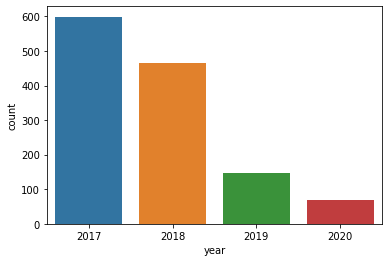

In [245]:
sns.countplot(dfih['year'])

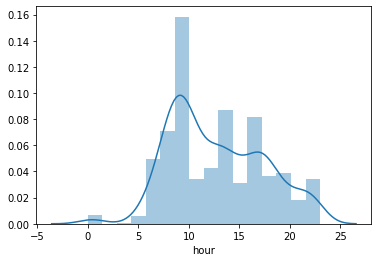

In [247]:
sns.distplot(dfih['hour'])

5. Encuentra el 20% de tweets con más retweet y observa la gráfica de dispersión de las publicaciones por horario.

In [233]:
size=dfih.shape[0]
0.2*size

256.6

In [241]:
dfih.sort_values(by="rt",ascending=False)[:257]

,tweet,date,id,rt,fav,Position#,year,month,weekday,hour
1105,RT @Alberto_Casado: EMPRENDEDOR. \n\n@Pantomim...,2017-06-16 09:06:10,875640634584911872,1717,0,-1,2017,6,Viernes,9
572,RT @wallapop: Lanzamos nuestra segunda edición...,2018-03-07 10:32:34,971332773750468610,55,0,54,2018,3,Miércoles,10
0,RT @dsaltaren: 🙌 Oferta de trabajo:\n\nEstamos...,2020-07-29 16:26:05,1288511121805254657,53,0,-1,2020,7,Miércoles,16
591,"RT @RSKsmart: ""Bitcoin, Blockchain &amp; Smart...",2018-02-27 17:41:12,968541541529681920,43,0,127,2018,2,Martes,17
980,RT @TechCrunch: Ironhack raises $3 million for...,2017-07-18 21:11:39,887419620323450881,37,0,-1,2017,7,Martes,21
...,...,...,...,...,...,...,...,...,...,...
558,RT @kairos_ds: ¿Estáis preparados #Ironhackers...,2018-03-13 11:45:05,973525352394960896,4,0,34,2018,3,Martes,11
1013,RT @jordimanchon: Interesante ponencia sobre C...,2017-07-10 17:14:17,884460780514619392,4,0,-1,2017,7,Lunes,17
1081,@FabioKorsos y @carlostallon del equipo de dis...,2017-06-21 10:55:43,877480143765352448,4,5,86,2017,6,Miércoles,10
502,Adidas Hackathon | Here to Create | Ironhack M...,2018-04-05 10:14:42,981837525647089666,4,5,-1,2018,4,Jueves,10


6. Repite lo anterior para el 20% de tweets con menos retweet.

In [242]:
dfih.sort_values(by="rt",ascending=True)[:257]

,tweet,date,id,rt,fav,Position#,year,month,weekday,hour
1282,Pablo Alonso nos cuenta como le fue la segunda...,2017-02-20 10:50:04,833629788493475840,0,1,-1,2017,2,Lunes,10
931,@trigoporres Pues dale caña y aprovecha Santia...,2017-08-16 15:42:52,897846128401686528,0,1,-1,2017,8,Miércoles,15
215,En @EDUCAWEB hablan de nosotros 🤓 gracias chic...,2019-01-10 17:12:12,1083411197381222403,0,3,-1,2019,1,Jueves,17
368,Openhouse!!! ¿Te apasiona crear? ¿Quieres cam...,2018-06-27 09:53:43,1011910436260806656,0,2,-1,2018,6,Miércoles,9
212,@MarcoGonzalo Sentimos la impuntualidad 😑 como...,2019-01-12 09:27:40,1084019069601353729,0,2,-1,2019,1,Sábado,9
...,...,...,...,...,...,...,...,...,...,...
715,RT @pintaborras: El #hype está muy alto en #ux...,2017-12-02 10:50:08,936910349193711616,1,0,20,2017,12,Sábado,10
483,RT @laiz_virginia: @IronhackMAD gracias por la...,2018-04-14 08:27:10,985071955958214657,1,0,75,2018,4,Sábado,8
469,RT @DanielaADN: Día 1 en #IronhackMad emoji ca...,2018-04-25 10:46:27,989093272185458689,1,0,25,2018,4,Miércoles,10
503,RT @aberouch: 8 consejos para sobrevivir a tus...,2018-04-03 13:37:59,981163908000989186,1,0,82,2018,4,Martes,13


7. Cuenta el número de palabras de todos los tweets y busca las primeras 20 que más aparecen.

In [278]:
from collections import Counter
import operator
palabras=""
for i in dfih["tweet"]:
    palabras+=i
palabras=palabras.split(" ")
count_palabras=Counter(palabras)
count_palabras

count_palabras_sort = sorted(count_palabras.items(), key=operator.itemgetter(1), reverse=True)
count_palabras_sort[0:20]

[('de', 841),
 ('en', 520),
 ('@IronhackMAD', 422),
 ('a', 398),
 ('el', 340),
 ('y', 328),
 ('la', 270),
 ('que', 206),
 ('con', 203),
 ('para', 191),
 ('los', 150),
 ('un', 145),
 ('', 130),
 ('@ironhack', 123),
 ('por', 119),
 ('del', 94),
 ('una', 87),
 ('las', 86),
 ('nuestro', 74),
 ('at', 70)]

8. Repite el paso anterior para cada año y observa si cambian de un año a otro y sí es así, agrega a una lista las que van cambiando.

In [281]:
años=sorted(dfih["year"].unique())
años

[2017, 2018, 2019, 2020]

In [ ]:
words_2017=[]
words_2018=[]
words_2019=[]
worda_2020=[]
for i in años:
    df=dfih[dfih["year"]==i]
    palabras=""
    for i in df["tweet"]:
        palabras+=i
    palabras=palabras.split(" ")
    count_palabras=Counter(palabras)
    count_palabras_sort= sorted(count_palabras.items(), key=operator.itemgetter(1), reverse=True)
    count_palabras_sort=count_palabras_sort[0:20]
    
    